# TensorFlow Tutorial

Welcome to this programming assignment which is a homework. Until now, you've always used numpy to build neural networks. Now we will step you through a deep learning framework that will allow you to build neural networks more easily. Machine learning frameworks like TensorFlow, PaddlePaddle, Torch, Caffe, Keras, and many others can speed up your machine learning development significantly. All of these frameworks also have a lot of documentation, which you should feel free to read. In this assignment, you will learn to do the following in TensorFlow: 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement a Neural Network

Programing frameworks can not only shorten your coding time, but sometimes also perform optimizations that speed up your code. 



## 1 - Exploring the Tensorflow Library

To start, you will import the library:


In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  
import os
import tensorflow as tf

print(tf.__version__)


2.16.1


Now that you have imported the library, we will walk you through its different applications. You will start with an example, where we compute for you the loss of one training example. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [2]:

y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                # Define y. Set to 39

loss = (y - y_hat)**2                    

print(loss.numpy())



9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Create a TensorFlow function (which replaces the Session in TensorFlow 1.x).
4. Run the function to execute the operations. 
 



In TensorFlow 2, Eager Mode is enabled by default. Eager Mode is a mode of operation that allows for immediate evaluation of operations. So you can execute TensorFlow operations like regular Python code, without the need to explicitly build a computational graph and run a session to execute the graph.

In [3]:

tf.executing_eagerly()

True

### 1.1 - Linear function

Lets start this programming exercise by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

**Exercise**: Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
You might find the following functions helpful: 
- tf.matmul(..., ...) to do a matrix multiplication
- tf.add(..., ...) to do an addition
- np.random.randn(...) to initialize randomly


In [6]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)
    W = tf.constant(np.random.randn(4 , 3) , name = "W")
    X = tf.constant(np.random.randn(3 , 1) , name = "X")
    b = tf.constant(np.random.randn(4 , 1) , name = "b")
    Y = tf.add(tf.matmul(W , X) , b)
    ### END CODE HERE ### 
    
    result = Y.numpy()

    return result

In [8]:
print( "result = " + str(linear_function()))

result = [[-1.98748544]
 [-2.76826248]
 [-0.78635415]
 [-2.77463846]]


*** Expected Output ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Computing the sigmoid 
Great! You just implemented a linear function. Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`. For this exercise lets define your own sigmoid function as an input. 

**<font color='red'>!!! Directly call function (eg. tf.math.sigmoid(x) ) is prohibited. Please implement it using the mathematical formula.**









In [9]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
  
  ### START CODE HERE ### (1 lines of code)
  return 1 / (1 + np.exp(-z))
  ### END CODE HERE ### 
  

In [10]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938558253978


*** Expected Output ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

### 1.3 -  Computing the Cost

You can also use a built-in function to compute the cost of your neural network. So instead of needing to write code to compute this as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

you can do it in one line of code in tensorflow!

**Exercise**: Implement the cross entropy loss. The function you will use is: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

Your code should input `logits`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [15]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy

    Arguments:
    logits -- output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels (1 or 0) 
    

    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ### 
    
    
    # Use the loss function (approx. 1 line)
   
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels)
    
    ### END CODE HERE ###
    
    return cost

In [16]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9], dtype=np.float64))
labels = np.array([0, 0, 1, 1], dtype=np.float64)

cost = cost(logits, labels)
print("cost =", cost.numpy())

cost = [1.00538722 1.03664083 0.41385432 0.39956614]


** Expected Output** : 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Using One Hot encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:

![onehot](https://drive.google.com/uc?export=view&id=1gPUoSaHHRDueUB_VQtZHzcjQMArjcJQ3)


This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code: 

- tf.one_hot(labels, depth, axis) 

**Exercise:** Implement the function below to take one vector of labels and the total number of classes $C$, and return the one hot encoding. Use `tf.one_hot()` to do this. 

In [35]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    depth = tf.constant(C , name = 'C')
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot = tf.one_hot(labels , depth , axis = 0)
    
    
    ### END CODE HERE ###
    return one_hot

In [36]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot.numpy()))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Initialize with zeros and ones

Now you will learn how to initialize a vector of zeros and ones. The function you will be calling is `tf.ones()`. To initialize with zeros you could use `tf.zeros()` instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 


In [37]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape = shape)
    
    
    ### END CODE HERE ###
    return ones

In [39]:
print ("ones = " + str(np.ones([3])))

ones = [1. 1. 1.]


**Expected Output:**

<table> 
    <tr> 
        <td>
            **ones**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

# 2 - Building your first neural network in tensorflow 
In this homework assignment, you will use TensorFlow to build and train a neural network model on the Fashion-MNIST dataset. Fashion-MNIST is a dataset of images of clothing items, with 10 categories of clothing types (e.g., t-shirt, dress, sneakers, etc.). The goal of this assignment is to build a model that can classify each clothing item image into its corresponding category. Let's delve into the problem you'd like to solve! 
### 2.0 - Problem statement: Fashion-MNIST 
Your task is to build a neural network model using TensorFlow that can accurately classify each clothing item image into its corresponding category. You should use the following specifications for your model: 
- The model should have 2 hidden layers, each with 128 nodes, and an output layer with 10 nodes (one for each category). 
- The activation function for the hidden layers should be ReLU. 
- The activation function for the output layer should be softmax.
- You should use the categorical cross-entropy loss function.
- You should use the SGD optimizer with a learning rate of 0.001.
- You should train the model for 10 epochs, with a batch size of 32.
- You should evaluate your model's accuracy on the test set and report the results.

- **Training set**: 60,000 images (28 by 28 pixels) of clothing items, each labeled with a category from 10 possible categories. 
- **Test set**: 10,000 images (28 by 28 pixels) of clothing items, each labeled with a category from 10 possible categories.

![fashin-mnist](https://drive.google.com/uc?export=view&id=1UiieVMbUZ-5K8l3Nzuzba8IZVvfDTJE_)


 Import the library:

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

!pip install mlxtend
import mlxtend as ml
from mlxtend.plotting import plot_confusion_matrix

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


setting training and testing sets

In [42]:
# train and test 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values between 0 to 255. The labels (target of classification) are an array of integers, in the range 0 to 9. This corresponds with the class of clothes that each image represents:


0. T-shirt/top
1. Trouser  
2. Pullover  
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [43]:
# class 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

you can check your training set and test set 

In [44]:
# shap of train  
X_train.shape

(60000, 28, 28)

In [45]:
# shape of test
X_test.shape

(10000, 28, 28)

We can  plot the first image in the training set using `plt.imshow()`, and add a color bar and grid lines for clarity. You can try to change the number of elements in X_train[].


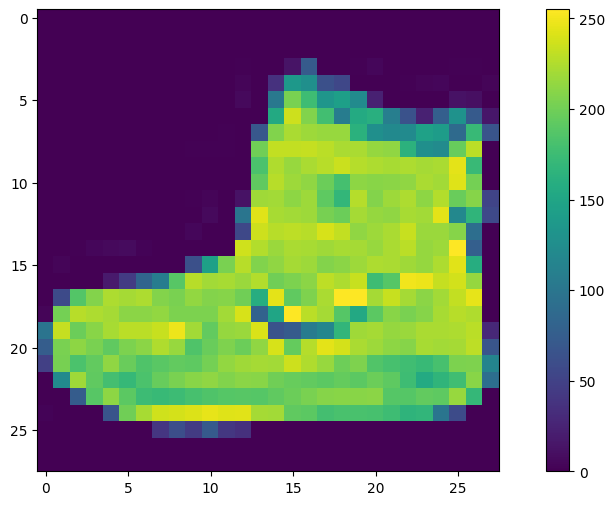

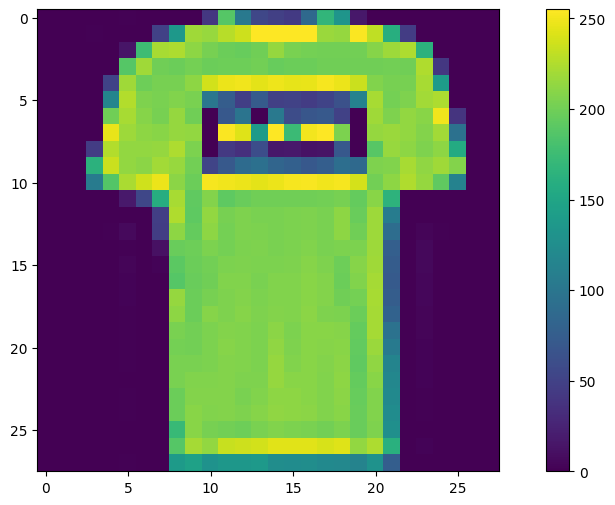

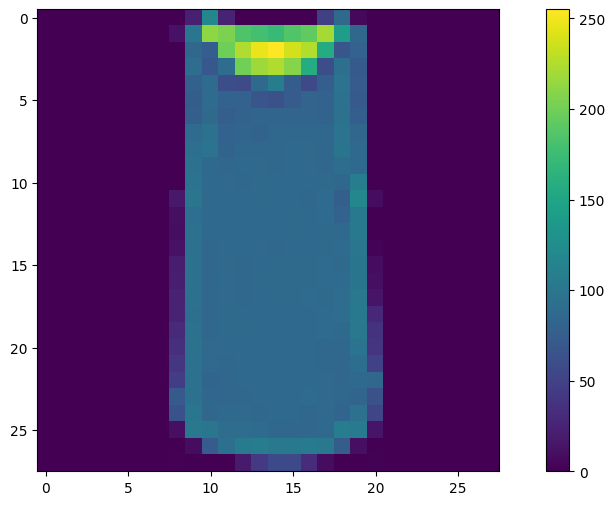

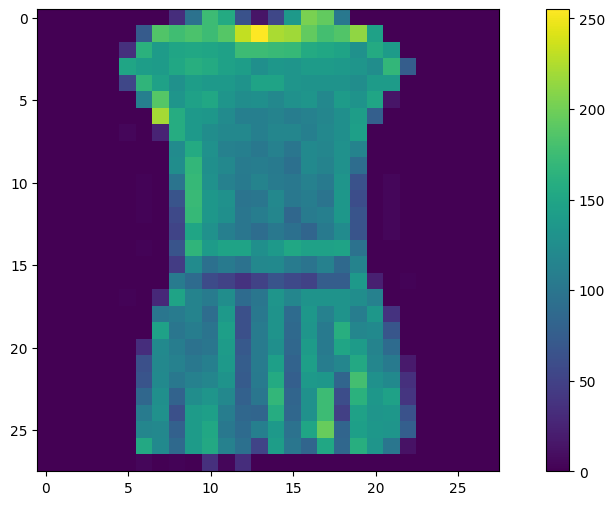

In [46]:
# images
for i in range(0,4):
  plt.figure(figsize=(12,6))
  plt.imshow(X_train[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()

We will scale these values in the range of 0 and 1 before before feeding the neural network model. To do this, we divide the values by 255. It is important that the training set and the test set can be pre-processed in the same way:

In [47]:

# Normalize image vectors
X_train = X_train / 255.0
X_test = X_test / 255.0


# Building Neural Network
### 2.2 - Building the model
Ok in this step, We will build the architecture of Neural Network.

Architecture:



*   **InputLayer**: This layer is responsible to receive The features of the data set, in the case of our problem the images have 3 dimensions (60000, 28.28) are 28x28 images in the case we should have 28 * 28 = 784, input neurons (the amount depends on the format and the number of features of your problem)

*   **Flatten**: This layer is specific, because We use for reshape features into 1D array, Flattens the input, Does not affect the batch size, serialize the tensor for the next layer.



*   **Hidden Layer 1** : This is first hidden layer on our network, it will consist of 128 neurons and will use an activation function called "reLu" (there are other activation functions available) I put 128 neurons in a playful way and without any reference, the goal is to understand the structure of a neural network built using TensorFlow.

*   **Hidden Layer 2** : This is ours second hidden layer, it will consist of 128 neurons and also will use activation function "reLu"



*   **Output Layer** : Finally, ours last layer in neural network the output layer is found by 10 neurons representing the 10 classes we have (in a playful way you can think of, as a specific final neuron for that class) your activation function is "Softmax" this activation fuction is specific for MultiClass problems.

you could use: 

```python
InputLayer(input_shape=(,), name='') 

Flatten(name='') 

Dense(units=, activation='', name='')
 

In [70]:
model = Sequential([
    ### START CODE HERE ### 
    InputLayer(input_shape = (28 , 28) , name = 'InputLayer'),
    Flatten(name = 'Flatten'),
    Dense(units = 128 , activation = "relu" , name = 'hidden_layer_1'),
    Dense(units = 128 , activation = "relu" , name = 'hidden_layer_2'),
    Dense(units = 10 , activation = "softmax" , name = 'output_layer'),
    ### END CODE HERE ###
    ])

Summary fo the built neural network, with him We can visualize the complete architecture.

In [71]:
# summary 
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


**Expected Output**: 

| Layer (type)       | Output Shape | Param #  |
|--------------------|--------------|----------|
| Flatten (Flatten)            | (None, 784)  | 0        |
| hidden_layer_1(Dense)     | (None, 128)  | 100480  |
| hidden_layer_2 (Dense)    | (None, 128)   | 16512    |
| output_layer (Dense)      | (None, 10)   | 1290     |
|------------------|------------------|----------------------|
| Total params     | 118,282  |
|Trainable params    | 118,282
| Non-trainable params | 0 
|------------------|------------------|----------------------|
| None          |                              |



In this next step, We will compile the model, Let's insert some more parameters.

- **Optmizer**: We will use Stochastic Gradient descent with Optimizer in our Network, We called the SGD, Responsible for calculating the gradients of the layers(Remember learning rate is 0.001).

- **Loss**: The loss function is the function, That we want to minimize, you should use the categorical cross-entropy loss function.

- **Metric**: This is metric, where model will be guided, most metrics for classification, We will use the Accuracy.

In [72]:
### START CODE HERE ###
sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
### END CODE HERE ###              

And Finally, We will can train our model! let's go

- **Epoch** : An epoch is a measure of the number of times all of the training vectors are used once to update the weights. For batch training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are updated.


- **Batch_size** : The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.


Once again I will use random values, as our goal is for a didactic purpose

In [73]:
np.random.seed(seed=42)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.20)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2522 - loss: 2.1601 - val_accuracy: 0.5982 - val_loss: 1.6454
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6158 - loss: 1.5152 - val_accuracy: 0.6632 - val_loss: 1.1718
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6621 - loss: 1.1129 - val_accuracy: 0.6835 - val_loss: 0.9559
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6832 - loss: 0.9375 - val_accuracy: 0.7042 - val_loss: 0.8525
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7046 - loss: 0.8479 - val_accuracy: 0.7224 - val_loss: 0.7883
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7238 - loss: 0.7879 - val_accuracy: 0.7401 - val_loss: 0.7438
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7420 - loss: 0.7476 - val_accuracy: 0.7565 - val_loss: 0.7118
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7589 - loss: 0.7092 - val_accuracy: 0.

### 2.3 Evaluation

The code snippet is used to evaluate the performance of a machine learning model on the test set. The inputs are:

- X_test: the feature data of the test set
- y_test: the label data of the test set
- verbose: set to 2 to print detailed information during evaluation, set to 0 to print no information, set to 1 to print a progress bar.

The function returns the average loss and accuracy of the model on the test set. The loss (test_loss) is the average loss value of the model on the test set, and the accuracy (test_acc) is the average accuracy of the model on the test set. These metrics can help us evaluate the generalization ability of the model, i.e., the performance of the model on unseen data..

In [74]:
# evaluation 
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - 824us/step - accuracy: 0.8196 - loss: 0.5121


In [75]:
# first metrics the Neural network 
print('Binary CrossEntropy: {}'.format(test_loss))
print('Accuracy: {}'.format(test_acc))

Binary CrossEntropy: 0.5120657086372375
Accuracy: 0.819599986076355


After computing the accuracy score and classification report for each class in the Fashion MNIST dataset, it can be helpful to visualize these metrics to gain a better understanding of the performance of the model for each class.

In [76]:
#  metrics for each class

y_pred = model.predict(X_test).argmax(axis=-1)
y_proba = model.predict(X_test).max(axis=-1)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
Accuracy: 0.8196


              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.97      0.94      0.95      1000
           2       0.74      0.67      0.70      1000
           3       0.80      0.86      0.83      1000
           4       0.68      0.79      0.73      1000
           5       0.94      0.87      0.91      1000
           6       0.59      0.48      0.53      1000
           7       0.87      0.91      0.89      1000
           8       0.91      0.94      0.93      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## Learning curve
We will plotting the learning curve for analyze the behavior the Neural network.

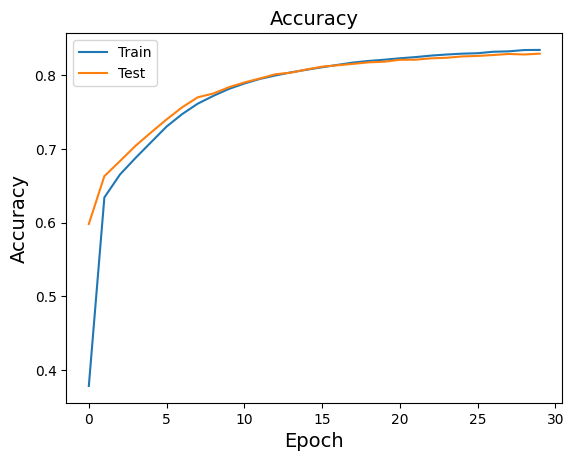

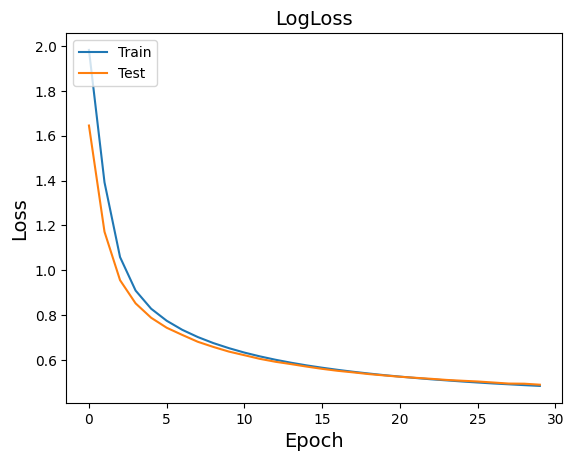

In [77]:
# Accuracy 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


print('\n')
print('\n')


# Cross Entropy  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LogLoss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **Congratulations on finishing this assignment.**